In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
student_data = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Lina/Big data & AI bootcamp/StudentsPerformance.csv")

In [3]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
student_data.describe(exclude='number')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


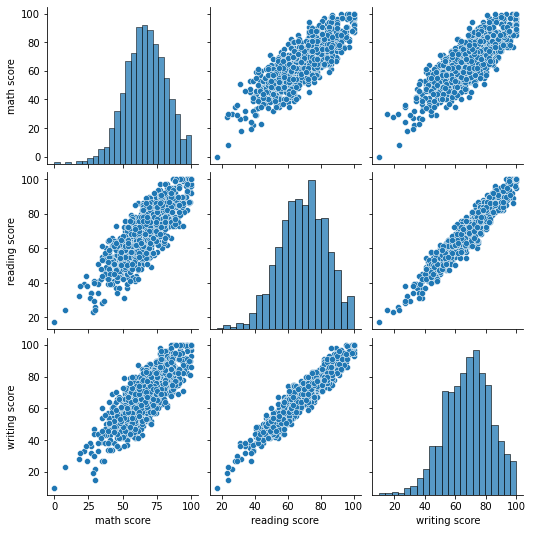

In [8]:
sns.pairplot(student_data)

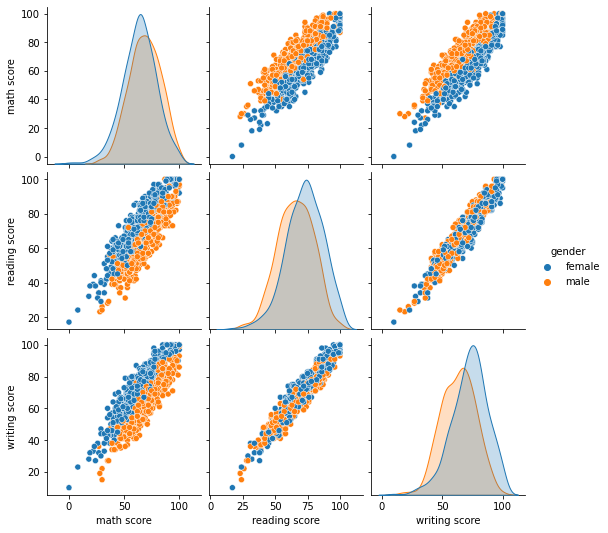

In [9]:
sns.pairplot(student_data, hue='gender')

In [10]:
corr = student_data.corr()

corr.style.background_gradient(cmap='coolwarm')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 0, 'parental level of educations')

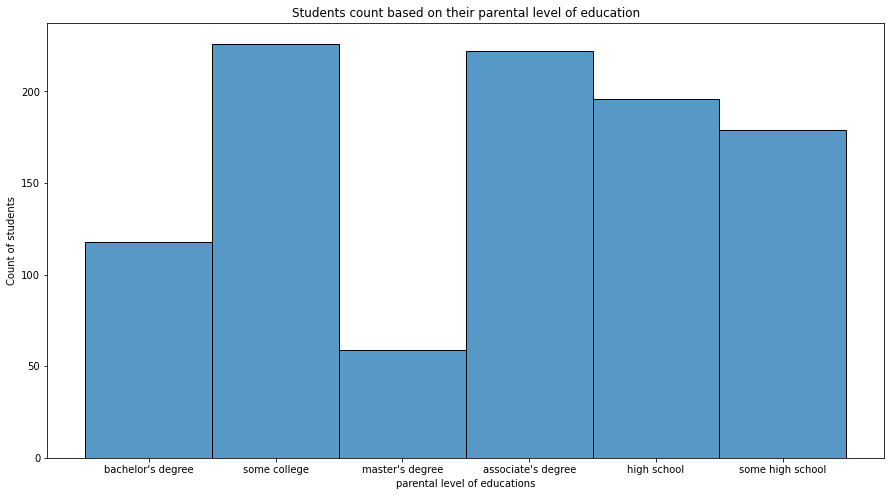

In [11]:
#Histogram chart
plt.figure(figsize=(15,8))
sns.histplot(data=student_data, x='parental level of education')
plt.title("Students count based on their parental level of education")
plt.ylabel("Count of students")
plt.xlabel("parental level of educations")

Text(0.5, 0, 'Supject')

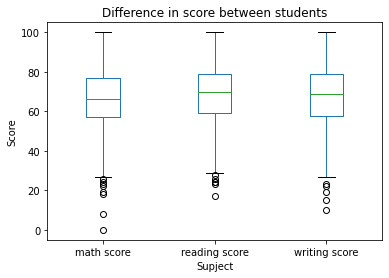

In [12]:
student_data[['math score','reading score','writing score']].plot.box();
plt.title("Difference in score between students")
plt.ylabel("Score")
plt.xlabel("Supject")

In [13]:
# First quartile (Q1)
Q1 = np.percentile(student_data['math score'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(student_data['math score'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q1- 1.5*(IQR))

27.0


In [14]:
# First quartile (Q1)
Q1 = np.percentile(student_data['reading score'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(student_data['reading score'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q1- 1.5*(IQR))

29.0


In [15]:
# First quartile (Q1)
Q1 = np.percentile(student_data['writing score'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(student_data['writing score'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q1- 1.5*(IQR))

25.25


In [16]:
#Dropping the outliers from column
student_data=student_data.drop(student_data[student_data['math score']<27 ].index)

In [17]:
#Dropping the outliers from column
student_data=student_data.drop(student_data[student_data['reading score']<29 ].index)

In [18]:
#Dropping the outliers from column
student_data=student_data.drop(student_data[student_data['writing score']<25.25 ].index)

<AxesSubplot:>

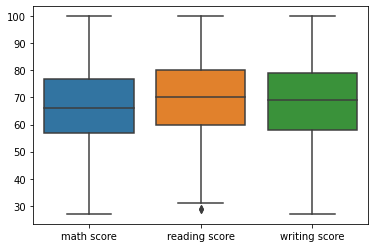

In [19]:
sns.boxplot(data=student_data)

Text(0.5, 0, 'score')

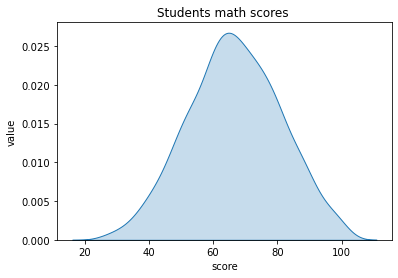

In [20]:
sns.kdeplot(data=student_data['math score'],shade=True)
plt.title("Students math scores ")
plt.ylabel("value")
plt.xlabel("score")

Text(0.5, 0, 'score')

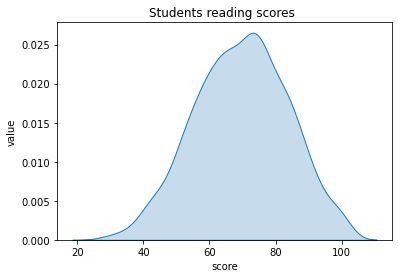

In [21]:
sns.kdeplot(data=student_data['reading score'],shade=True)
plt.title("Students reading scores ")
plt.ylabel("value")
plt.xlabel("score")

Text(0.5, 0, 'score')

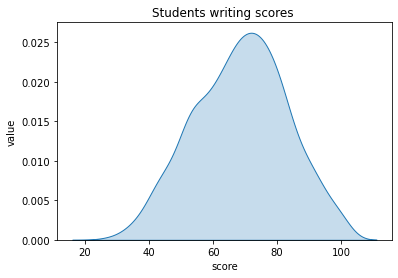

In [22]:
sns.kdeplot(data=student_data['writing score'],shade=True)
plt.title("Students writing scores ")
plt.ylabel("value")
plt.xlabel("score")

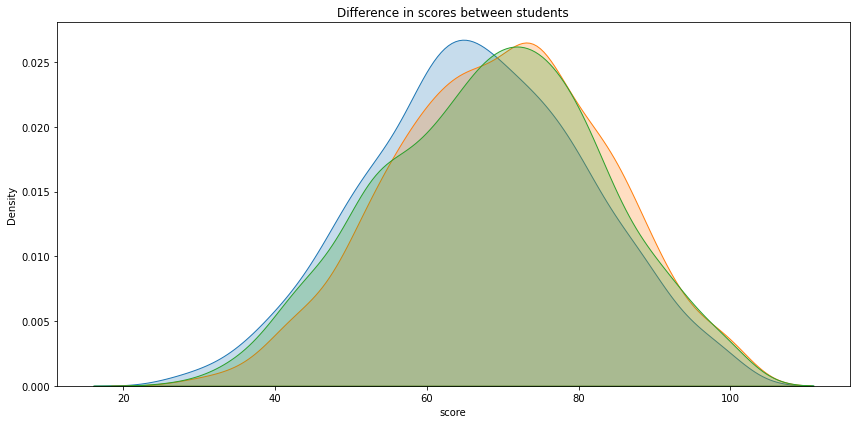

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=student_data['math score'], shade=True)
sns.kdeplot(data=student_data['reading score'], shade=True)
sns.kdeplot(data=student_data['writing score'], shade=True)
plt.title("Difference in scores between students")
plt.xlabel("score")
plt.tight_layout()

In [24]:
# Splitting data

# Split into training and test sets
training, test = train_test_split(
    student_data, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42 # so that regardless of how many times I run the code I will have the "exact" points
)

In [25]:
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
877,male,group C,some high school,standard,none,57,61,54
220,female,group D,high school,standard,completed,56,68,74
299,male,group D,associate's degree,free/reduced,none,90,87,75
50,male,group E,some college,standard,none,53,55,48
890,female,group E,some college,standard,completed,86,85,91


In [26]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
218,male,group B,high school,free/reduced,none,66,77,70
337,male,group C,associate's degree,standard,none,49,51,43
508,male,group C,master's degree,standard,none,79,78,77
314,female,group C,bachelor's degree,standard,completed,59,64,75
91,male,group C,high school,free/reduced,none,27,34,36


In [27]:
mathScore=student_data["math score"]
mathScore

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 988, dtype: int64

In [28]:
readingScore=student_data["reading score"]
readingScore

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 988, dtype: int64

In [29]:
writingScore=student_data["writing score"]
writingScore

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 988, dtype: int64

In [30]:
totalScore = mathScore+readingScore+writingScore
totalScore

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 988, dtype: int64

In [31]:
training['Total_score'] = totalScore
training['Total_score']

<ipython-input-31-eec22539c6b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Total_score'] = totalScore


877    172
220    198
299    252
50     156
890    262
      ... 
109    206
275    234
871    218
442    201
105    197
Name: Total_score, Length: 790, dtype: int64

In [32]:
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score
877,male,group C,some high school,standard,none,57,61,54,172
220,female,group D,high school,standard,completed,56,68,74,198
299,male,group D,associate's degree,free/reduced,none,90,87,75,252
50,male,group E,some college,standard,none,53,55,48,156
890,female,group E,some college,standard,completed,86,85,91,262


In [33]:
test['Total_score'] = totalScore
test['Total_score']

<ipython-input-33-985032bf6728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Total_score'] = totalScore


218    213
337    143
508    234
314    198
91      97
      ... 
457    155
682    171
310    229
741    150
242    163
Name: Total_score, Length: 198, dtype: int64

In [34]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score
218,male,group B,high school,free/reduced,none,66,77,70,213
337,male,group C,associate's degree,standard,none,49,51,43,143
508,male,group C,master's degree,standard,none,79,78,77,234
314,female,group C,bachelor's degree,standard,completed,59,64,75,198
91,male,group C,high school,free/reduced,none,27,34,36,97


In [35]:
Performance =pd.cut(training.Total_score,bins=[0,200,350],labels=['Low performance','High performance'])

In [36]:
training['Performance'] = Performance

<ipython-input-36-2e2534c1f469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Performance'] = Performance


In [37]:
Performance =pd.cut(test.Total_score,bins=[0,200,300],labels=['Low performance','High performance'])

In [38]:
test['Performance'] = Performance

<ipython-input-38-99ed13b26c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Performance'] = Performance


In [39]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Performance
218,male,group B,high school,free/reduced,none,66,77,70,213,High performance
337,male,group C,associate's degree,standard,none,49,51,43,143,Low performance
508,male,group C,master's degree,standard,none,79,78,77,234,High performance
314,female,group C,bachelor's degree,standard,completed,59,64,75,198,Low performance
91,male,group C,high school,free/reduced,none,27,34,36,97,Low performance


In [41]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["gender", "lunch","test preparation course"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(training[col_names]).toarray()

one_hot_df_val = one_hot.transform(test[col_names]).toarray()

In [42]:
# Look at the categories
one_hot.categories_

[array(['female', 'male'], dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [43]:
one_hot_df

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1.],
       ...,
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1.]])

In [44]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['gender_female',
 'gender_male',
 'lunch_free/reduced',
 'lunch_standard',
 'test preparation course_completed',
 'test preparation course_none']

In [45]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=training.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(790, 6)
(198, 6)


In [46]:
oh_df.head()

,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
877,0.0,1.0,0.0,1.0,0.0,1.0
220,1.0,0.0,0.0,1.0,1.0,0.0
299,0.0,1.0,1.0,0.0,0.0,1.0
50,0.0,1.0,0.0,1.0,0.0,1.0
890,1.0,0.0,0.0,1.0,1.0,0.0


In [47]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = training.merge(oh_df, on=training.index).set_index("key_0").drop(["gender", "lunch","test preparation course"], axis=1)
val_new = test.merge(oh_df_val, on=test.index).set_index("key_0").drop(["gender", "lunch","test preparation course"], axis=1)

print(train_new.shape)
print(val_new.shape)

(790, 13)
(198, 13)


In [48]:
train_new

,race/ethnicity,parental level of education,math score,reading score,writing score,Total_score,Performance,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
key_0,,,,,,,,,,,,,
877,group C,some high school,57,61,54,172,Low performance,0.0,1.0,0.0,1.0,0.0,1.0
220,group D,high school,56,68,74,198,Low performance,1.0,0.0,0.0,1.0,1.0,0.0
299,group D,associate's degree,90,87,75,252,High performance,0.0,1.0,1.0,0.0,0.0,1.0
50,group E,some college,53,55,48,156,Low performance,0.0,1.0,0.0,1.0,0.0,1.0
890,group E,some college,86,85,91,262,High performance,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,group B,some high school,70,64,72,206,High performance,1.0,0.0,0.0,1.0,0.0,1.0
275,group C,bachelor's degree,83,78,73,234,High performance,0.0,1.0,0.0,1.0,0.0,1.0
871,group C,some college,70,72,76,218,High performance,1.0,0.0,0.0,1.0,1.0,0.0


In [49]:
val_new

,race/ethnicity,parental level of education,math score,reading score,writing score,Total_score,Performance,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
key_0,,,,,,,,,,,,,
218,group B,high school,66,77,70,213,High performance,0.0,1.0,1.0,0.0,0.0,1.0
337,group C,associate's degree,49,51,43,143,Low performance,0.0,1.0,0.0,1.0,0.0,1.0
508,group C,master's degree,79,78,77,234,High performance,0.0,1.0,0.0,1.0,0.0,1.0
314,group C,bachelor's degree,59,64,75,198,Low performance,1.0,0.0,0.0,1.0,1.0,0.0
91,group C,high school,27,34,36,97,Low performance,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,group D,associate's degree,53,54,48,155,Low performance,0.0,1.0,1.0,0.0,0.0,1.0
682,group B,high school,62,55,54,171,Low performance,0.0,1.0,0.0,1.0,0.0,1.0
310,group B,associate's degree,73,76,80,229,High performance,1.0,0.0,0.0,1.0,0.0,1.0


In [99]:
training.dropna(axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Performance
877,male,group C,some high school,standard,none,57,61,54,172,Low performance
220,female,group D,high school,standard,completed,56,68,74,198,Low performance
299,male,group D,associate's degree,free/reduced,none,90,87,75,252,High performance
50,male,group E,some college,standard,none,53,55,48,156,Low performance
890,female,group E,some college,standard,completed,86,85,91,262,High performance
...,...,...,...,...,...,...,...,...,...,...
109,female,group B,some high school,standard,none,70,64,72,206,High performance
275,male,group C,bachelor's degree,standard,none,83,78,73,234,High performance
871,female,group C,some college,standard,completed,70,72,76,218,High performance
442,female,group A,some high school,free/reduced,none,59,73,69,201,High performance


In [100]:
test.dropna(axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Performance
218,male,group B,high school,free/reduced,none,66,77,70,213,High performance
337,male,group C,associate's degree,standard,none,49,51,43,143,Low performance
508,male,group C,master's degree,standard,none,79,78,77,234,High performance
314,female,group C,bachelor's degree,standard,completed,59,64,75,198,Low performance
91,male,group C,high school,free/reduced,none,27,34,36,97,Low performance
...,...,...,...,...,...,...,...,...,...,...
457,male,group D,associate's degree,free/reduced,none,53,54,48,155,Low performance
682,male,group B,high school,standard,none,62,55,54,171,Low performance
310,female,group B,associate's degree,standard,none,73,76,80,229,High performance
741,female,group A,associate's degree,free/reduced,none,37,57,56,150,Low performance


In [51]:
ordinal = OrdinalEncoder()

col_names = ["race/ethnicity","parental level of education","Performance]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(training[col_names])
ordinal_ls_val = ordinal.transform(test[col_names])

In [52]:
# Look at categories
ordinal.categories_

[array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object)]

In [53]:
# Add oridnally encoded column to the data
train_new["race/ethnicity"] = ordinal_ls
val_new["race/ethnicity"] = ordinal_ls_val

train_new.sample(5)

,race/ethnicity,parental level of education,math score,reading score,writing score,Total_score,Performance,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
key_0,,,,,,,,,,,,,
222,2.0,some high school,55,65,62,182,Low performance,1.0,0.0,1.0,0.0,0.0,1.0
230,3.0,some college,76,64,66,206,High performance,0.0,1.0,0.0,1.0,0.0,1.0
195,3.0,associate's degree,61,55,52,168,Low performance,0.0,1.0,0.0,1.0,0.0,1.0
487,2.0,associate's degree,60,75,74,209,High performance,1.0,0.0,1.0,0.0,0.0,1.0
909,4.0,bachelor's degree,70,64,70,204,High performance,0.0,1.0,0.0,1.0,1.0,0.0


In [54]:
# Add oridnally encoded column to the data
train_new["parental level of education"] = ordinal_ls
val_new["parental level of education"] = ordinal_ls_val

train_new.sample(5)

,race/ethnicity,parental level of education,math score,reading score,writing score,Total_score,Performance,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
key_0,,,,,,,,,,,,,
141,2.0,2.0,59,62,64,185,Low performance,1.0,0.0,1.0,0.0,0.0,1.0
419,4.0,4.0,57,56,54,167,Low performance,0.0,1.0,1.0,0.0,1.0,0.0
685,4.0,4.0,94,99,100,293,High performance,1.0,0.0,0.0,1.0,1.0,0.0
714,1.0,1.0,60,70,74,204,High performance,1.0,0.0,0.0,1.0,1.0,0.0
720,2.0,2.0,62,72,70,204,High performance,1.0,0.0,1.0,0.0,0.0,1.0


In [106]:
# Add oridnally encoded column to the data
train_new["Performance"] = ordinal_ls
val_new["Performance"] = ordinal_ls_val

train_new.sample(5)

,race/ethnicity,parental level of education,math score,reading score,writing score,Total_score,Performance,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
key_0,,,,,,,,,,,,,
931,3.0,3.0,62,57,62,181,3.0,0.0,1.0,1.0,0.0,0.0,1.0
877,2.0,2.0,57,61,54,172,2.0,0.0,1.0,0.0,1.0,0.0,1.0
656,2.0,2.0,77,67,64,208,2.0,0.0,1.0,1.0,0.0,0.0,1.0
925,4.0,4.0,74,64,60,198,4.0,0.0,1.0,0.0,1.0,1.0,0.0
869,2.0,2.0,49,51,51,151,2.0,0.0,1.0,1.0,0.0,0.0,1.0


In [107]:
# Creating the feature set and the traget set for both the training and the validation 

target = "Total_score"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [108]:
# Only use numerical features

X_train_n = X_train.select_dtypes(exclude=["category", "object"])
X_test_n = X_val.select_dtypes(exclude=["category", "object"])

# Create a Pipeline for our model
pipe = make_pipeline(
    # 1st step handle missing values 
    SimpleImputer(), # Impute missing values
    # scale columns 
    StandardScaler(),
    # apply the model
    LinearRegression()
)

pipe.fit(X_train_n,y_train)
pipe.score(X_test_n, y_val)

1.0

In [109]:
# Mean 5-Fold Cross Val Score

cross_val_score(pipe, X_train_n, y_train, cv=10).mean()

1.0

In [110]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_val, y_val)

1.0

In [55]:
# Creating the feature set and the traget set for both the training and the validation 

target = "Performance"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [56]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
y_pred = classifier.predict(X_val)

print(y_pred)

['High performance' 'Low performance' 'High performance' 'Low performance'
 'Low performance' 'High performance' 'High performance'
 'High performance' 'Low performance' 'Low performance' 'Low performance'
 'High performance' 'Low performance' 'Low performance' 'High performance'
 'High performance' 'Low performance' 'Low performance' 'High performance'
 'Low performance' 'High performance' 'Low performance' 'Low performance'
 'Low performance' 'High performance' 'High performance' 'Low performance'
 'Low performance' 'Low performance' 'Low performance' 'Low performance'
 'High performance' 'Low performance' 'High performance' 'Low performance'
 'Low performance' 'High performance' 'Low performance' 'Low performance'
 'Low performance' 'Low performance' 'High performance' 'Low performance'
 'High performance' 'Low performance' 'Low performance' 'High performance'
 'Low performance' 'Low performance' 'Low performance' 'Low performance'
 'High performance' 'High performance' 'High perfor

In [58]:
test_dataset = pd.DataFrame(X_val, columns= ['Performance', 'Total_score'])

test_dataset['Actual_score'] = y_val.to_numpy()
test_dataset['Predict_score'] = y_pred

test_dataset

,Performance,Total_score,Actual_score,Predict_score
key_0,,,,
218,NaN,213,High performance,High performance
337,NaN,143,Low performance,Low performance
508,NaN,234,High performance,High performance
314,NaN,198,Low performance,Low performance
91,NaN,97,Low performance,Low performance
...,...,...,...,...
457,NaN,155,Low performance,Low performance
682,NaN,171,Low performance,Low performance
310,NaN,229,High performance,High performance


In [59]:
# Counting the records when the actual and the predicitons are the same

(test_dataset['Actual_score'] == test_dataset['Predict_score']).value_counts()

True     193
False      5
dtype: int64

In [60]:
# Note: This is a link for more details on the confusion matrix in scikit-learn

cm = confusion_matrix(y_val, y_pred)

cm

array([[ 89,   2],
       [  3, 104]], dtype=int64)

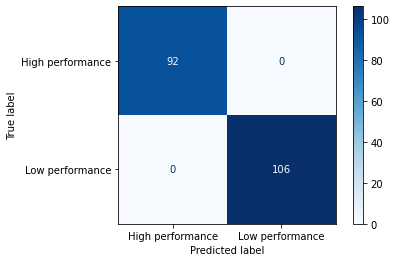

In [61]:
plot_confusion_matrix(classifier, X=X_val, y_true=y_pred, cmap='Blues')